In [2]:

import pandas as pd
import seaborn as sns
import os

In [3]:
HC_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/HC/basic_graph_metrics.csv'
ST01_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/ST01/basic_graph_metrics.csv'
ST02_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/ST02/basic_graph_metrics.csv'
ST03_path = '/Users/jk1/temp/stroke_resilience/output/stroke_resilience/ST03/basic_graph_metrics.csv'

output_save_path = '/Users/jk1/temp/stroke_resilience/output/figures'

In [4]:

HC_metrics = pd.read_csv(HC_path)
HC_metrics['timepoint_group'] = 'HC'

ST01_metrics = pd.read_csv(ST01_path)
ST01_metrics['timepoint_group'] = 'ST01'

ST02_metrics = pd.read_csv(ST02_path)
ST02_metrics['timepoint_group'] = 'ST02'

ST03_metrics = pd.read_csv(ST03_path)
ST03_metrics['timepoint_group'] = 'ST03'

all_groups_metrics = pd.concat([HC_metrics, ST01_metrics, ST02_metrics, ST03_metrics], ignore_index=True)

In [5]:
# Drop threshold < 0.3
all_groups_metrics = all_groups_metrics[all_groups_metrics.threshold != 'top0']
all_groups_metrics = all_groups_metrics[all_groups_metrics.threshold != 'top10']
all_groups_metrics = all_groups_metrics[all_groups_metrics.threshold != 'top20']


In [6]:
all_groups_metrics = all_groups_metrics.drop('subject', axis=1)

In [12]:
mean_metrics = all_groups_metrics.groupby(
    ['timepoint_group', 'threshold']
).mean()
mean_metrics

n_nodes       n_edges  mean_degree  \
timepoint_group threshold                                       
HC              top100       240.0  15529.750000   129.414583   
                top30        240.0   8604.000000    71.700000   
                top40        240.0  11472.000000    95.600000   
                top50        240.0  14340.000000   119.500000   
                top60        240.0  15518.125000   129.317708   
                top70        240.0  15529.750000   129.414583   
                top80        240.0  15529.750000   129.414583   
                top90        240.0  15529.750000   129.414583   
ST01            top100       240.0  16104.400000   134.203333   
                top30        240.0   8604.000000    71.700000   
                top40        240.0  11472.000000    95.600000   
                top50        240.0  14334.733333   119.456111   
                top60        240.0  15869.200000   132.243333   
                top70        240.0  16104.400000   134.203333   
                top80        240.0  16104.400000   134.203333   
                top90        240.0  16104.400000   134.203333   
ST02            top100       240.0  16145.600000   134.546667   
                top30        240.0   8604.000000    71.700000   
                top40        240.0  11472.000000    95.600000   
                top50        240.0  14333.000000   119.441667   
                top60        240.0  15663.000000   130.525000   
                top70        240.0  16099.666667   134.163889   
                top80        240.0  16145.600000   134.546667   
                top90        240.0  16145.600000   134.546667   
ST03            top100       240.0  16941.533333   141.179444   
                top30        240.0   8604.000000    71.700000   
                top40        240.0  11472.000000    95.600000   
                top50        240.0  14340.000000   119.500000   
                top60        240.0  16405.666667   136.713889   
                top70        240.0  16910.666667   140.922222   
                top80        240.0  16941.533333   141.179444   
                top90        240.0  16941.533333   141.179444   

                           degree_distribution_1  degree_distribution_2  \
timepoint_group threshold                                                 
HC              top100                136.000000             129.375000   
                top30                  75.562500              73.187500   
                top40                 101.812500              97.562500   
                top50                 124.750000             121.750000   
                top60                 135.937500             129.250000   
                top70                 136.000000             129.375000   
                top80                 136.000000             129.375000   
                top90                 136.000000             129.375000   
ST01            top100                143.666667             125.400000   
                top30                  83.200000              70.200000   
                top40                 107.866667              90.200000   
                top50                 131.333333             112.266667   
                top60                 142.333333             124.266667   
                top70                 143.666667             125.400000   
                top80                 143.666667             125.400000   
                top90                 143.666667             125.400000   
ST02            top100                134.866667             128.533333   
                top30                  77.266667              70.333333   
                top40                 101.400000              92.266667   
                top50                 122.266667             113.333333   
                top60                 131.666667             123.800000   
                top70                 134.800000             128.000000   
                

In [17]:
degree_distribution_df = mean_metrics.T
degree_distribution_df = degree_distribution_df.drop(['n_nodes', 'n_edges', 'mean_degree'])
degree_distribution_df = degree_distribution_df.astype(int)


In [46]:
linear_df = pd.DataFrame()
for threshold in all_groups_metrics.threshold.unique():
    threshold_filter = [col for col in degree_distribution_df if threshold in col]
    HC_thresh_df = degree_distribution_df[('HC', threshold)].to_frame()
    HC_thresh_df.columns = ['degree_distribution']
    HC_thresh_df['timepoint_group'] = 'HC'

    ST01_thresh_df = degree_distribution_df[('ST01', threshold)].to_frame()
    ST01_thresh_df.columns = ['degree_distribution']
    ST01_thresh_df['timepoint_group'] = 'ST01'

    ST02_thresh_df = degree_distribution_df[('ST02', threshold)].to_frame()
    ST02_thresh_df.columns = ['degree_distribution']
    ST02_thresh_df['timepoint_group'] = 'ST02'

    ST03_thresh_df = degree_distribution_df[('ST03', threshold)].to_frame()
    ST03_thresh_df.columns = ['degree_distribution']
    ST03_thresh_df['timepoint_group'] = 'ST03'

    thresh_df = pd.concat([HC_thresh_df, ST01_thresh_df, ST02_thresh_df, ST03_thresh_df])
    thresh_df['threshold'] = threshold
    linear_df = linear_df.append(thresh_df)

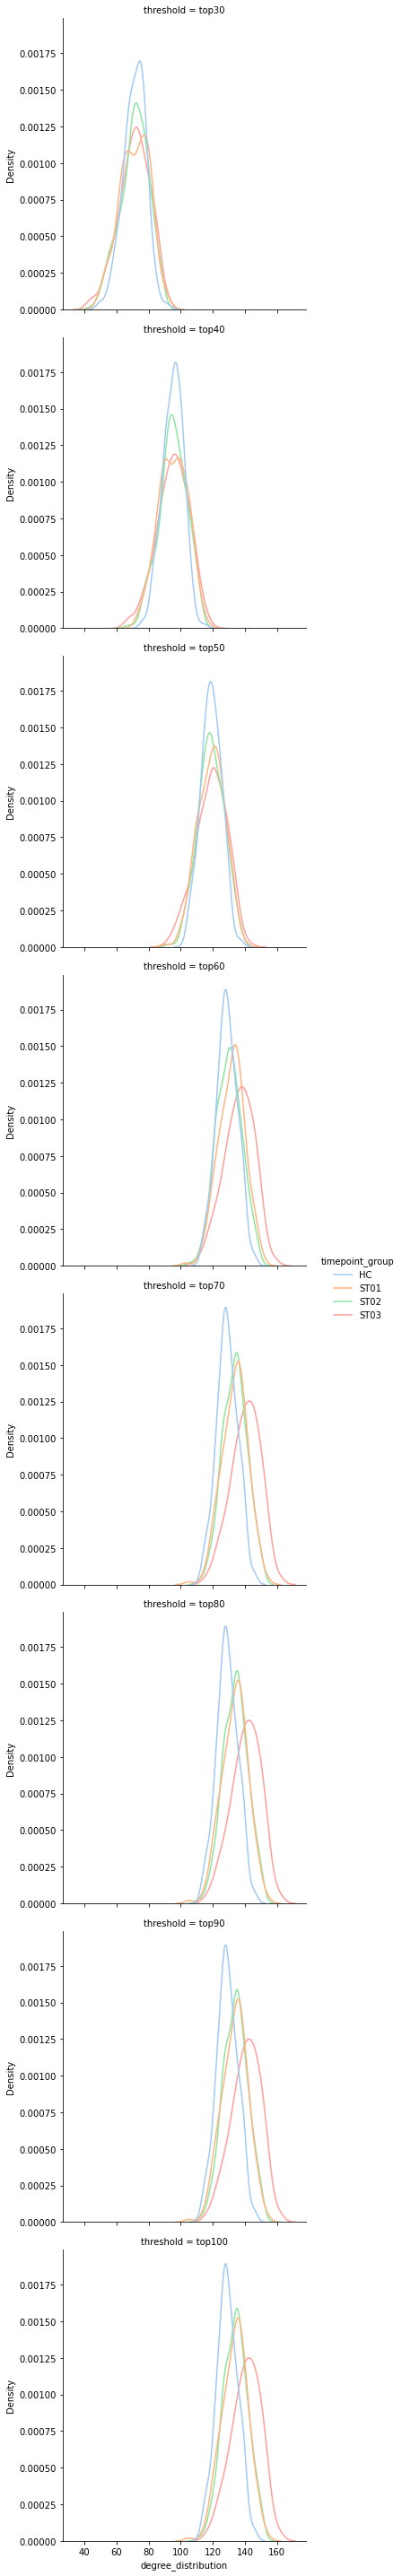

In [56]:
g = sns.displot(data=linear_df, x='degree_distribution', hue='timepoint_group', row='threshold',
            alpha=1, palette='pastel', kind="kde")

In [57]:
g.savefig(os.path.join(output_save_path, 'degree_distribution' + ".png"))